EMOTION DETECTION 

In [1]:
!unzip emotion_all.zip

Archive:  emotion_all.zip
  inflating: images/final test/angry/0.jpg  
  inflating: images/final test/angry/1.jpg  
  inflating: images/final test/angry/10.jpg  
  inflating: images/final test/angry/1015.jpg  
  inflating: images/final test/angry/1016.jpg  
  inflating: images/final test/angry/1018.jpg  
  inflating: images/final test/angry/1039.jpg  
  inflating: images/final test/angry/1051.jpg  
  inflating: images/final test/angry/1061.jpg  
  inflating: images/final test/angry/1066.jpg  
  inflating: images/final test/angry/107.jpg  
  inflating: images/final test/angry/1090.jpg  
  inflating: images/final test/angry/1098.jpg  
  inflating: images/final test/angry/1102.jpg  
  inflating: images/final test/angry/1105.jpg  
  inflating: images/final test/angry/1108.jpg  
  inflating: images/final test/angry/1122.jpg  
  inflating: images/final test/angry/1123.jpg  
  inflating: images/final test/angry/1147.jpg  
  inflating: images/final test/angry/1150.jpg  
  inflating: images/fin

In [2]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [3]:
train_dir=r"C:\Users\ADMIN\Downloads\train"
test_dir=r"C:\Users\ADMIN\Downloads\final test"
val_dir=r"C:\Users\ADMIN\Downloads\validation"

In [10]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest"
        )

In [11]:
val_test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),    # Resize all images to 150x150
    batch_size=32,
    class_mode='categorical'   # Change to 'binary' if you have 2 classes
)

Found 26921 images belonging to 7 classes.


In [13]:
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 7066 images belonging to 7 classes.


In [14]:
test_generator=val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1900 images belonging to 7 classes.


In [16]:
train_generator.image_shape

(150, 150, 3)

In [27]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

MODEL PREPARATION

In [30]:
def prepare_model():
        
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Set to True for fine-tuning later

    # Add custom classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Reduce dimensions
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(7, activation='softmax')(x)  # 7 classes for emotion detection

    # Create final model
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [31]:
model=prepare_model()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22028\1022841837.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [33]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

Epoch 1/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 717s 845ms/step - accuracy: 0.3019 - loss: 1.7746 - val_accuracy: 0.4140 - val_loss: 1.5391
Epoch 2/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\ADMIN\anaconda3\envs\work\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
c:\Users\ADMIN\anaconda3\envs\work\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


842/842 ━━━━━━━━━━━━━━━━━━━━ 1222s 1s/step - accuracy: 0.3728 - loss: 1.5945 - val_accuracy: 0.4275 - val_loss: 1.5173
Epoch 4/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 533s 633ms/step - accuracy: 0.3863 - loss: 1.5649 - val_accuracy: 0.4271 - val_loss: 1.5290
Epoch 6/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 697s 828ms/step - accuracy: 0.3838 - loss: 1.5593 - val_accuracy: 0.4413 - val_loss: 1.5237
Epoch 8/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 533s 633ms/step - accuracy: 0.3915 - loss: 1.5549 - val_accuracy: 0.4359 - val_loss: 1.4937
Epoch 10/10
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


TEST WITH NEW IMAGE

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: sad


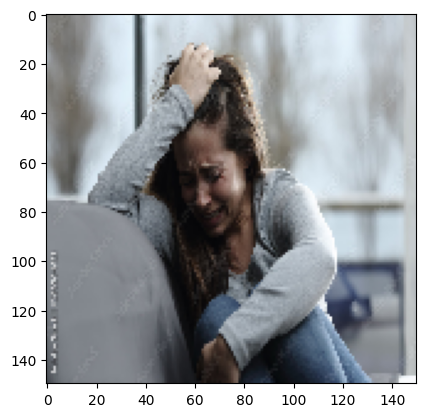

In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image from file
img_path = r"C:\Users\ADMIN\Downloads\sad.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)
#print(f"Predicted class: {predicted_class}")
class_names = {v: k for k, v in train_generator.class_indices.items()}
predicted_class_name = class_names[predicted_class_index[0]]

print(f"Predicted class: {predicted_class_name}")


RESULT

In conclusion, emotion detection from images using a trained deep learning model is a powerful tool for analyzing facial expressions and predicting emotions. By leveraging techniques and large datasets of labeled facial images, the model can effectively classify emotions like happiness, sadness, anger, and more. This technology has wide-ranging applications, from improving human-computer interaction to enhancing mental health monitoring and customer experience analysis. However, the performance of the model depends on the quality of the training data, the robustness of the architecture, and the diversity of the input images. With continued advancements in AI, emotion detection systems will become even more accurate and versatile, opening up new possibilities for real-world use cases.